
___
# Random Forest Project



# Import Libraries

**Import the usual libraries for pandas and plotting. You can import sklearn later on.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Get the Data

**Use pandas to read loan_data.csv as a dataframe called loans.**

In [2]:
df=pd.read_csv('loan_data.csv')

**Check out the info(), head(), and describe() methods on loans.**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [6]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


# Exploratory Data Analysis


**Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.**


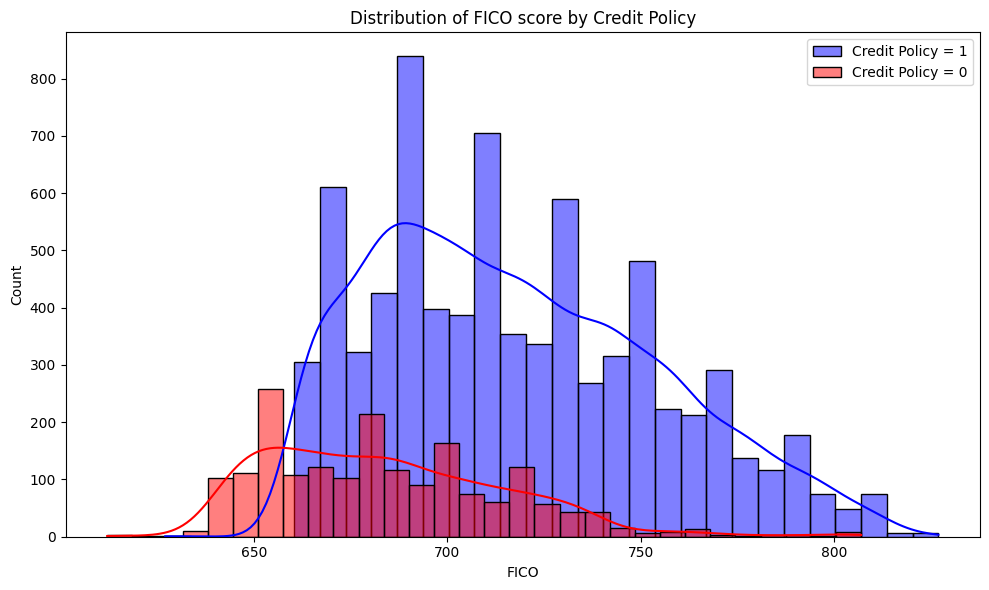

In [7]:
df_credit_policy_1 = df[df['credit.policy'] == 1]
df_credit_policy_0 = df[df['credit.policy'] == 0]

plt.figure(figsize=(10, 6))

sns.histplot(df_credit_policy_1['fico'], bins=30, kde=True, color='blue', label='Credit Policy = 1')

sns.histplot(df_credit_policy_0['fico'], bins=30, kde=True, color='red', label='Credit Policy = 0')

plt.xlabel('FICO')
plt.ylabel('Count')
plt.title('Distribution of FICO score by Credit Policy')
plt.legend()

plt.tight_layout()
plt.show()

**Create a similar figure, except this time select by the not.fully.paid column.**

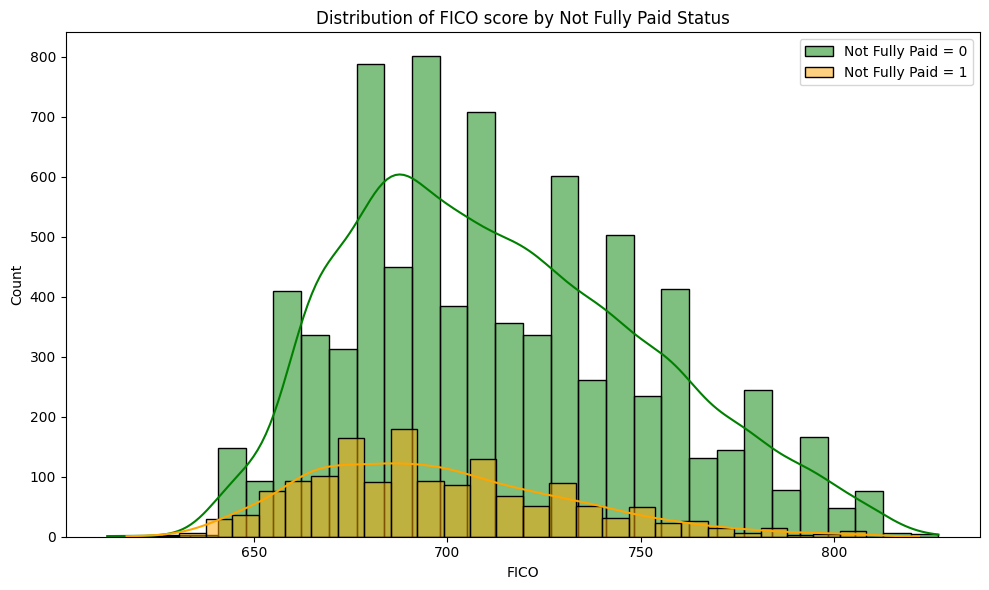

In [8]:
df_not_fully_paid_0 = df[df['not.fully.paid'] == 0]
df_not_fully_paid_1 = df[df['not.fully.paid'] == 1]

plt.figure(figsize=(10, 6))

sns.histplot(df_not_fully_paid_0['fico'], bins=30, kde=True, color='green', label='Not Fully Paid = 0')

sns.histplot(df_not_fully_paid_1['fico'], bins=30, kde=True, color='orange', label='Not Fully Paid = 1')

plt.xlabel('FICO')
plt.ylabel('Count')
plt.title('Distribution of FICO score by Not Fully Paid Status')
plt.legend()

plt.tight_layout()
plt.show()

**Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid.**

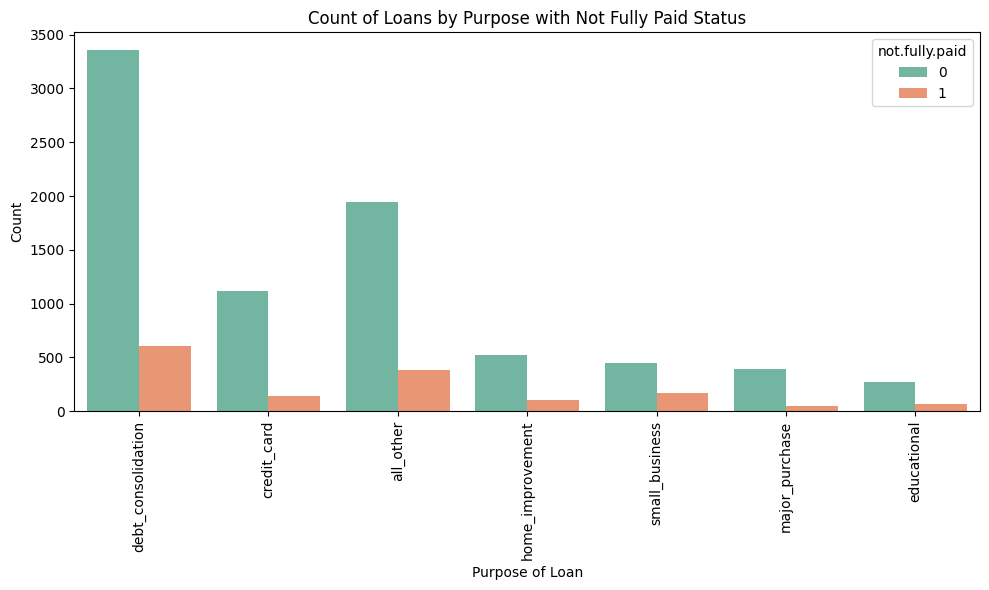

In [9]:
plt.figure(figsize=(10, 6))

sns.countplot(x='purpose', hue='not.fully.paid', data=df, palette='Set2')

plt.xlabel('Purpose of Loan')
plt.ylabel('Count')
plt.title('Count of Loans by Purpose with Not Fully Paid Status')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

**Let's see the trend between FICO score and interest rate. Recreate the following jointplot.**

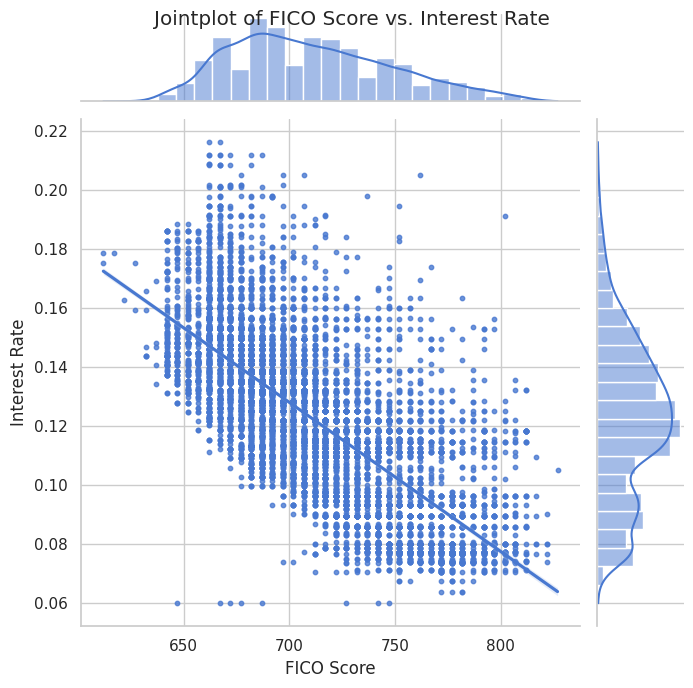

In [10]:
sns.set(style="whitegrid", palette="muted", color_codes=True)

sns.jointplot(x='fico', y='int.rate', data=df, kind='reg', height=7, scatter_kws={'s': 10}, marginal_kws=dict(bins=25, fill=True))

plt.xlabel('FICO Score')
plt.ylabel('Interest Rate')
plt.suptitle('Jointplot of FICO Score vs. Interest Rate')

plt.show()

**Create the following lmplots to see if the trend differed between not.fully.paid and credit.policy.**

<Figure size 1000x700 with 0 Axes>

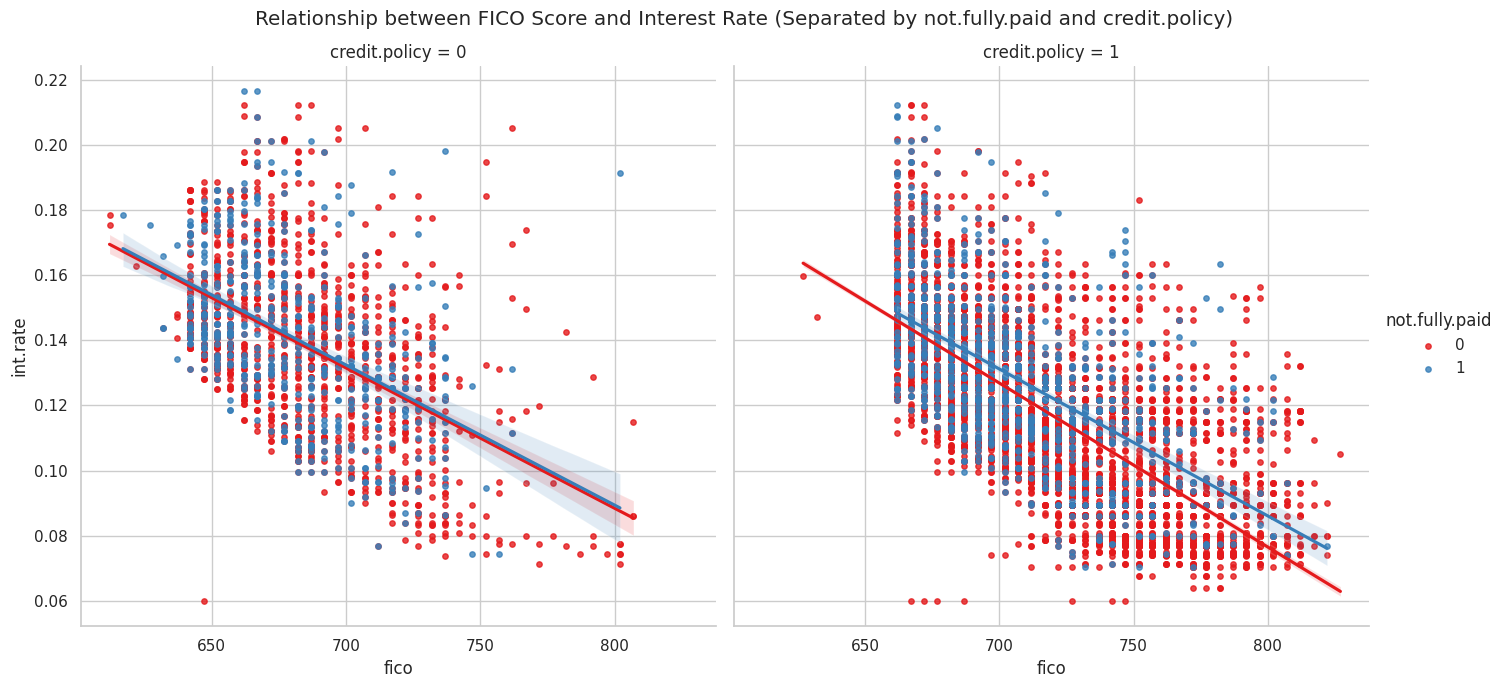

<Figure size 1000x700 with 0 Axes>

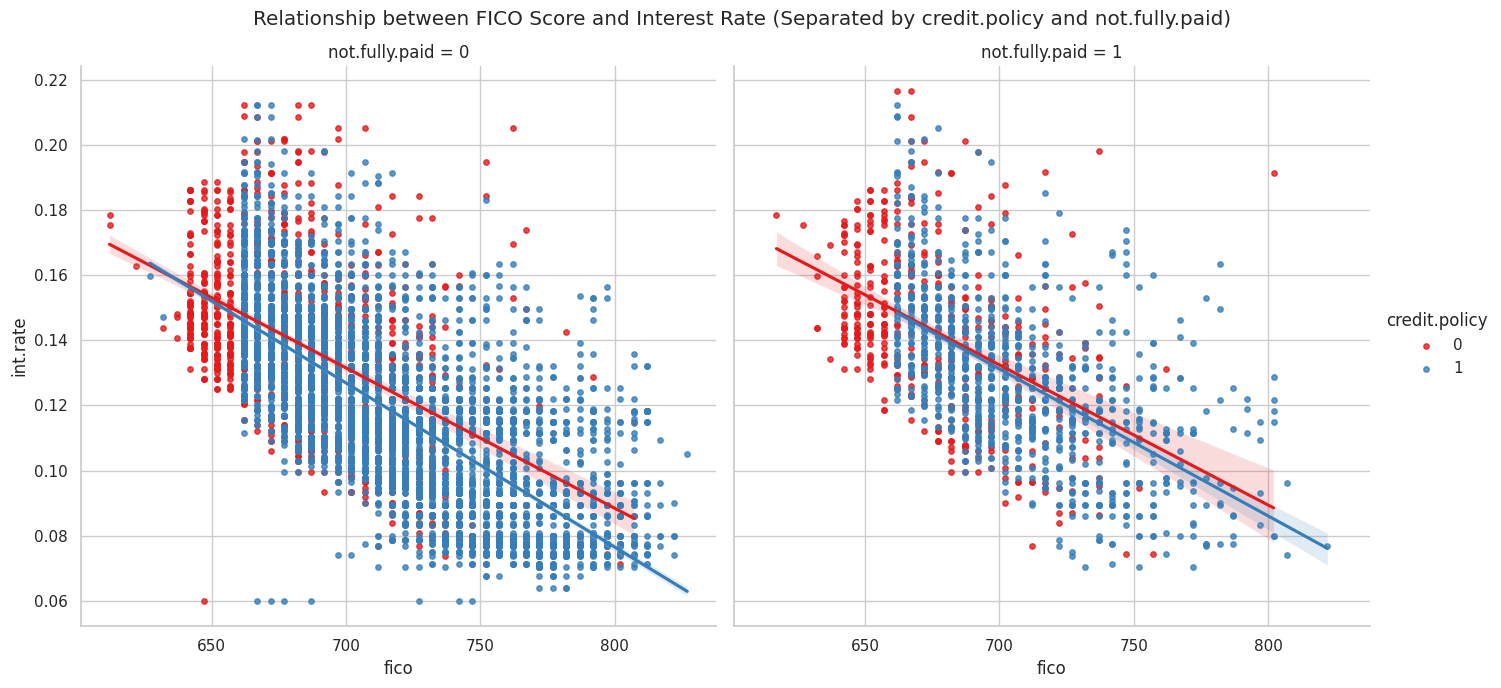

In [11]:
sns.set(style="whitegrid", palette="muted", color_codes=True)

# Create the first lmplot for not.fully.paid
plt.figure(figsize=(10, 7))
sns.lmplot(x='fico', y='int.rate', data=df, hue='not.fully.paid', col='credit.policy', palette='Set1', height=7, scatter_kws={'s': 15})
plt.subplots_adjust(top=0.9)
plt.suptitle('Relationship between FICO Score and Interest Rate (Separated by not.fully.paid and credit.policy)')
plt.show()

# Create the second lmplot for credit.policy
plt.figure(figsize=(10, 7))
sns.lmplot(x='fico', y='int.rate', data=df, hue='credit.policy', col='not.fully.paid', palette='Set1', height=7, scatter_kws={'s': 15})
plt.subplots_adjust(top=0.9)
plt.suptitle('Relationship between FICO Score and Interest Rate (Separated by credit.policy and not.fully.paid)')
plt.show()

# Setting up the Data

Let's get ready to set up our data for our Random Forest Classification Model!

**Check loans.info() again.**

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Categorical Features

Notice that the **purpose** column as categorical

That means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies.


**Create a list of 1 element containing the string 'purpose'. Call this list cat_feats.**

In [13]:
cat_feats = ['purpose']

**Now use pd.get_dummies(loans,columns=cat_feats,drop_first=True) to create a fixed larger dataframe that has new feature columns with dummy variables. Set this dataframe as final_data.**

In [15]:
final_data = pd.get_dummies(df, columns=cat_feats, drop_first=True)

## Train Test Split

Now its time to split our data into a training set and a testing set!

** Use sklearn to split your data into a training set and a testing set as we've done in the past.**

In [17]:
from sklearn.model_selection import train_test_split

# Assuming final_data is your dataframe containing all features and target variables

# Define your features (X) and target (y)
X = final_data.drop('not.fully.paid', axis=1)  # Features excluding the target column
y = final_data['not.fully.paid']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Training a Decision Tree Model

Let's start by training a single decision tree first!

** Import DecisionTreeClassifier**

In [19]:
from sklearn.tree import DecisionTreeClassifier

**Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.**

In [20]:
dtree = DecisionTreeClassifier(random_state=42)

In [21]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## Predictions and Evaluation of Decision Tree
**Create predictions from the test set and create a classification report and a confusion matrix.**

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = dtree.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      2408
           1       0.20      0.21      0.20       466

    accuracy                           0.74      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.74      0.74      0.74      2874

Confusion Matrix:
[[2015  393]
 [ 368   98]]


## Training the Random Forest model

Now its time to train our model!

**Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.**

In [23]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42)

rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Predictions and Evaluation

Let's predict off the y_test values and evaluate our model.

**Predict the class of not.fully.paid for the X_test data.**

In [24]:
rfc_pred = rfc.predict(X_test)

**Now create a classification report from the results. Do you get anything strange or some sort of warning?**

In [25]:
print("Random Forest - Classification Report:")
print(classification_report(y_test, rfc_pred))

Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2408
           1       0.37      0.02      0.03       466

    accuracy                           0.84      2874
   macro avg       0.60      0.51      0.47      2874
weighted avg       0.76      0.84      0.77      2874



**Show the Confusion Matrix for the predictions.**

In [26]:
print("Random Forest - Confusion Matrix:")
print(confusion_matrix(y_test, rfc_pred))

Random Forest - Confusion Matrix:
[[2396   12]
 [ 459    7]]


**What performed better the random forest or the decision tree?**

Decision Tree:

Accuracy:
(
𝑇
𝑃
+
𝑇
𝑁
)
/
(
𝑇
𝑃
+
𝑇
𝑁
+
𝐹
𝑃
+
𝐹
𝑁
)
=
(
2015
+
98
)
/
(
2015
+
393
+
368
+
98
)
≈
0.74
(TP+TN)/(TP+TN+FP+FN)=(2015+98)/(2015+393+368+98)≈0.74
Precision:
𝑇
𝑃
/
(
𝑇
𝑃
+
𝐹
𝑃
)
=
98
/
(
98
+
393
)
≈
0.20
TP/(TP+FP)=98/(98+393)≈0.20
Recall (True Positive Rate):
𝑇
𝑃
/
(
𝑇
𝑃
+
𝐹
𝑁
)
=
98
/
(
98
+
368
)
≈
0.21
TP/(TP+FN)=98/(98+368)≈0.21


Random Forest:

Accuracy:
(
𝑇
𝑃
+
𝑇
𝑁
)
/
(
𝑇
𝑃
+
𝑇
𝑁
+
𝐹
𝑃
+
𝐹
𝑁
)
=
(
2396
+
7
)
/
(
2396
+
12
+
459
+
7
)
≈
0.84
(TP+TN)/(TP+TN+FP+FN)=(2396+7)/(2396+12+459+7)≈0.84
Precision:
𝑇
𝑃
/
(
𝑇
𝑃
+
𝐹
𝑃
)
=
7
/
(
7
+
12
)
≈
0.37
TP/(TP+FP)=7/(7+12)≈0.37
Recall (True Positive Rate):
𝑇
𝑃
/
(
𝑇
𝑃
+
𝐹
𝑁
)
=
7
/
(
7
+
459
)
≈
0.02
TP/(TP+FN)=7/(7+459)≈0.02
Performance Comparison:
Accuracy: Random Forest (0.84) performs better than the Decision Tree (0.74).

**Perform hyperparameter tuning on a Decision Tree using GridSearchCV to find the best max_depth and min_samples_split values.**

**Task: Compare the performance of Decision Tree classifiers using different criterion functions ('gini' vs. 'entropy')**

### BAGGING AND BOOSTING TECHNIQUE

**Train Model on atleast 2 Bagging and Boosting Technique.**

Gradient Boosting

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

gb_clf.fit(X_train, y_train)

y_pred_gb = gb_clf.predict(X_test)

print("Gradient Boosting - Classification Report:")
print(classification_report(y_test, y_pred_gb))

print("\nGradient Boosting - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))


Gradient Boosting - Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2408
           1       0.48      0.03      0.05       466

    accuracy                           0.84      2874
   macro avg       0.66      0.51      0.48      2874
weighted avg       0.78      0.84      0.77      2874


Gradient Boosting - Confusion Matrix:
[[2394   14]
 [ 453   13]]


# HAPPY LEARNING!

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

gb_clf.fit(X_train, y_train)

y_pred_gb = gb_clf.predict(X_test)

print("Gradient Boosting - Classification Report:")
print(classification_report(y_test, y_pred_gb))

print("\nGradient Boosting - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))
